In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [3]:
class Dot:
    def __init__(self, px1, px9, px25, bg):
        '''
            Class defining single dot.
            Initialization parameters are:
                px1 - brightness level of the brightest pixel
                px9 - total brightness of the 3x3 pixel square. The central pixel of the square is the brightest pixel
                px25 - total brightness of the 5x5 pixel square. The central pixel of the square is the brightest pixel
                bg - the level of the background brightness 
      
            Calculated properties are:
                px1_perc - px1 to px25 ratio (without considering background brightness)
                px9_perc - px9 to px25 ratio (without considering background brightness)
                px1_perc_norm - px1 to px25 ratio (considering background brightness)
                px9_perc_norm - px9 to px25 ratio (considering background brightness)
             
        '''
        self.px1 = px1
        self.px9 = px9
        self.px25 = px25
        self.bg = bg
        self.px1_norm = px1 - bg
        self.px9_norm = px9 - 9*bg
        self.px25_norm = px25 - 25*bg
        self.count_percentage()
    def count_percentage(self):
        self.px1_perc = self.px1/self.px25*100
        self.px9_perc = self.px9/self.px25*100
        self.px1_perc_norm = self.px1_norm/self.px25_norm*100
        self.px9_perc_norm = self.px9_norm/self.px25_norm*100


In [ ]:
class Dots:
    '''
        Class containing every dot and its property
        Input parameters
    '''
    def __init__(self, dots, x_range):
        self.dots = [Dot(dot[0], dot[1], dot[2], dot[3]) for dot in dots]
        self.x = x_range
        self.arr_px1 = [dot.px1_perc for dot in self.dots]
        self.arr_px9 = [dot.px9_perc for dot in self.dots]
        self.arr_px1n = [dot.px1_perc_norm for dot in self.dots]
        self.arr_px9n = [dot.px9_perc_norm for dot in self.dots]
        
    def buildChart(self):
        fig1, ax1 = plt.subplots(1)
        
        ax1.plot(self.x, self.arr_px1n, color='b')
        ax1.plot(self.x, self.arr_px9n, color='m')

In [86]:
alum1 = {
    'coord':[-9.3, -8.2, -7.2, -6.2, -5.1, - 4.1, -3.0, -2.0, -0.9, 0.1, 1.2, 2.2, 3.2, 4.4, 5.3, 6.3, 7.4, 8.4, 9.5],
    'px1': [78, 80, 86, 82, 84, 85, 87, 85, 85, 83, 83, 81, 85, 82, 83, 80, 82, 76, 73],
    'px9': [95, 95, 95, 95, 95, 95, 96, 96, 96, 95, 95, 95, 95, 95, 95, 95, 95, 94, 95],
    'name': 'alum1',
    'color': 'r',
    'label': "Алюминий 1"
}

In [85]:
alum2 = {
    'coord':[-9, -8, -7, -6.0, -5.0, - 4.0, -3.0, -2.0, -1.0, 0.0, 1, 2, 3, 4, 5, 6, 7, 8, 9, ],
    'px1': [41, 47, 52, 61, 68, 77, 76, 78, 78, 77, 80, 82, 82, 85, 82, 79, 79, 76, 70,  ],
    'px9': [93, 92, 91, 95, 92, 92, 93, 94, 94, 93, 94, 95, 93, 95, 94, 93, 93, 93, 92,],
    'name': 'alum2',
    'color': 'g',   
    'label': "Алюминий 2"
}

In [84]:
alum3 = {
    'coord': [-8.9, -8.2, -7.2, -6.2, -5.1, -4.1, -3, -2, -1, 0.1, 1.1, 2.2, 3.2, 4.3, 5.3, 6.4, 7.4, 9.5],
    'px1': [74, 85, 86, 85, 85, 84, 86, 85, 86, 82, 85, 87, 85, 85, 86, 87, 84, 76] ,
    'px9': [94, 95, 95, 96, 95, 95, 96, 95, 95, 95, 95, 96, 95, 95, 95, 95, 95, 95],
    'name': 'alum3',
    'color': 'b',
    'label': "Алюминий 3"
    
}

In [83]:
tit = {
    'coord': [-10.3, -9.3, -8.3, -7.2, -6.2, -5.1, -4.1, -3.1, -2.1, -1.0, 0, 1.1, 2.1, 3.2, 4.2, 5.3, 6.3, 7.4, 8.4, 9.5],
    'px1': [76, 75, 82, 81, 85, 83, 83, 85, 84, 82, 84, 83, 84, 83, 83, 81, 82, 80, 77, 73],
    'px9': [93, 93, 95, 94, 95, 95, 94, 94, 94, 94, 94, 93, 94, 93, 93, 93, 94, 93, 92, 92],
    'name': 'titan',
    "color": "m",
    'label': "Титан"
}

In [99]:
class DotResults:
    def __init__(self):
        self.allData = {}
    def addNewData(self, data):
        self.allData[data["name"]] = {
            "coord" : data["coord"],
            "px1" : data["px1"],
            "px9" : data["px9"],
            "color": data["color"],
            "label": data["label"]
        }
        
        
    def buildChartPx1(self):
        fig1, ax1 = plt.subplots(1)
        for key in self.allData.keys():
            item = self.allData[key]
            ax1.plot(item["coord"],item["px1"] , color=item["color"], label=item["label"])
        ax1.set_title("Сбор энергии в одном пикселе")
        ax1.set_xlabel("Угол, градусов")
        ax1.set_ylabel("Процент энергии")
        ax1.legend()
    def buildChartPx9(self):
        fig1, ax1 = plt.subplots(1)
        for key in self.allData.keys():
            item = self.allData[key]
            ax1.plot(item["coord"],item["px9"] , color=item["color"], label=item["label"])
        ax1.set_title("Сбор энергии в квадрате 3 на 3 пикселя")
        ax1.set_xlabel("Угол, градусов")
        ax1.set_ylabel("Процент энергии")
        ax1.legend()

In [100]:
DR = DotResults()
DR.addNewData(alum1)
DR.addNewData(alum2)
DR.addNewData(alum3)
DR.addNewData(tit)

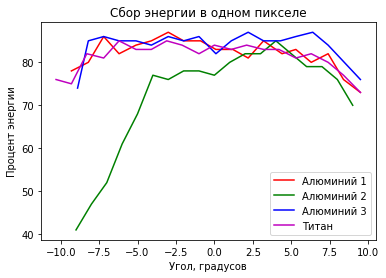

In [101]:
DR.buildChartPx1()

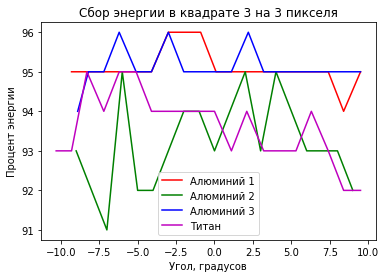

In [102]:
DR.buildChartPx9()